In [1]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr

sns.set(style="whitegrid")


In [2]:
# URL par défaut du dataset Excel
url_xls_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url_xls_path)

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns = ["cement", "slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", "strength"]

# Aperçu général du dataset

In [5]:
df["water_cement_ratio"] = df["water"] / df["cement"]
df["binder"] = df["cement"] + df["slag"] + df["fly_ash"]
df["fine_to_coarse_ratio"] = df["fine_aggregate"] / df["coarse_aggregate"]
df.head(n=10)

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,water_cement_ratio,binder,fine_to_coarse_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000,540.0,0.650000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000,540.0,0.640758
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714,475.0,0.637339
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714,475.0,0.637339
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767,331.0,0.843724
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,0.857143,380.0,0.718884
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299,0.600000,475.0,0.637339
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,0.600000,475.0,0.637339
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,0.857143,380.0,0.718884
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,0.480000,475.0,0.637339


In [6]:
df.describe(include='all').T.round(2)

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,1030.0,73.90,86.28,0.00,0.00,22.00,142.95,359.40
fly_ash,1030.0,54.19,64.00,0.00,0.00,0.00,118.27,200.10
water,1030.0,181.57,21.36,121.75,164.90,185.00,192.00,247.00
superplasticizer,1030.0,6.20,5.97,0.00,0.00,6.35,10.16,32.20
coarse_aggregate,1030.0,972.92,77.75,801.00,932.00,968.00,1029.40,1145.00
fine_aggregate,1030.0,773.58,80.18,594.00,730.95,779.51,824.00,992.60
age,1030.0,45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,1030.0,35.82,16.71,2.33,23.71,34.44,46.14,82.60
water_cement_ratio,1030.0,0.75,0.31,0.27,0.53,0.68,0.94,1.88


# Distribution de chaque variable

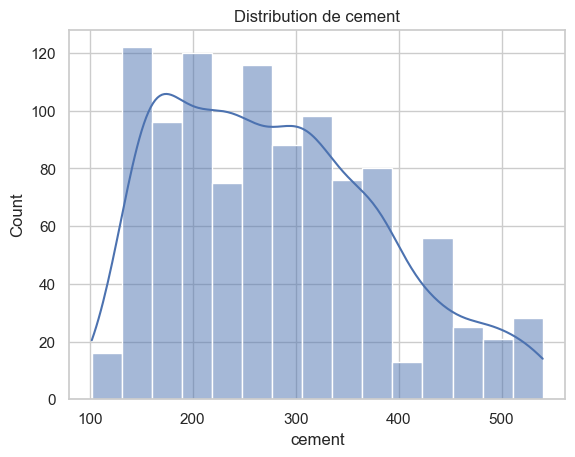

Valeurs extrêmes: 102.0 → 540.0 




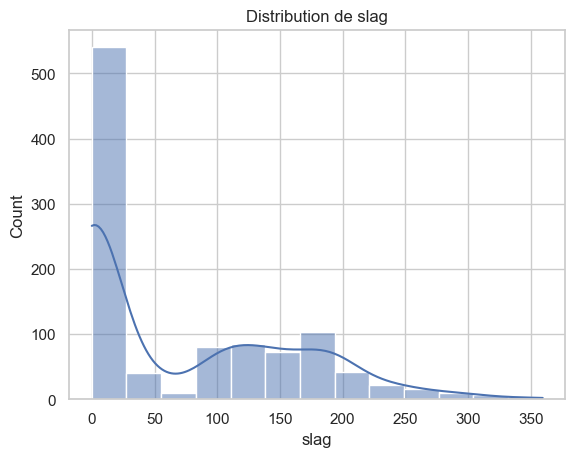

Valeurs extrêmes: 0.0 → 359.4 




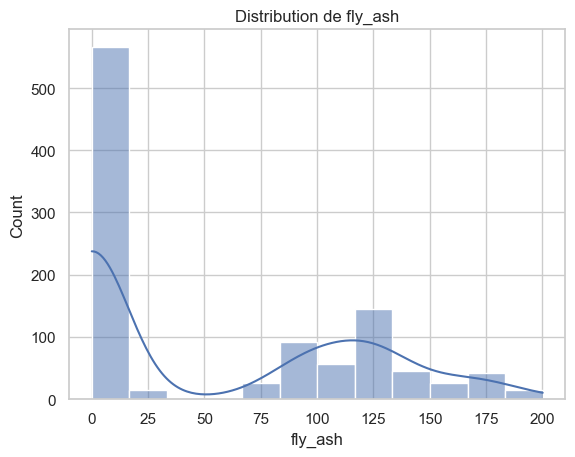

Valeurs extrêmes: 0.0 → 200.1 




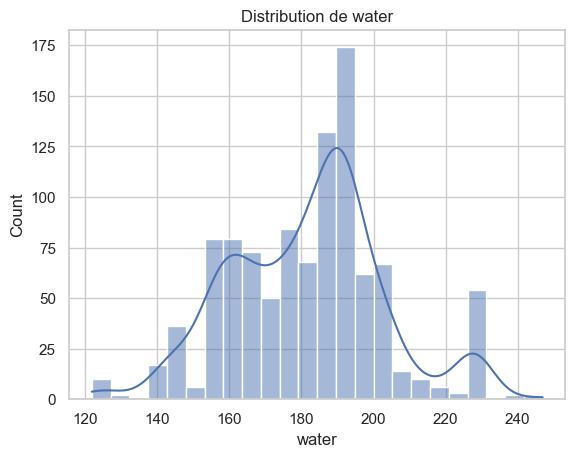

Valeurs extrêmes: 121.75 → 247.0 




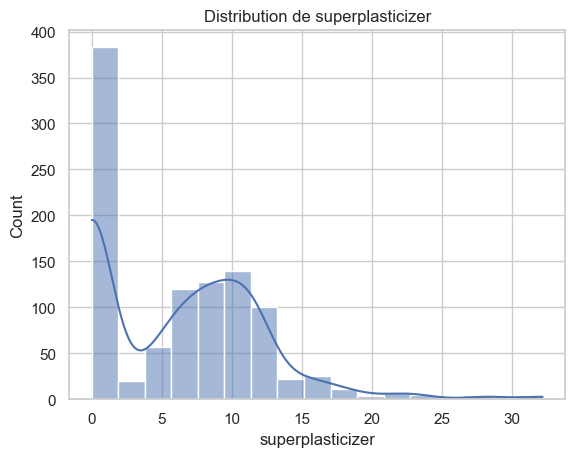

Valeurs extrêmes: 0.0 → 32.2 




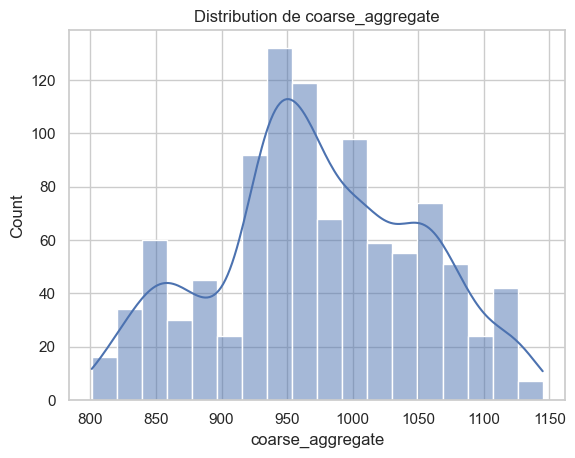

Valeurs extrêmes: 801.0 → 1145.0 




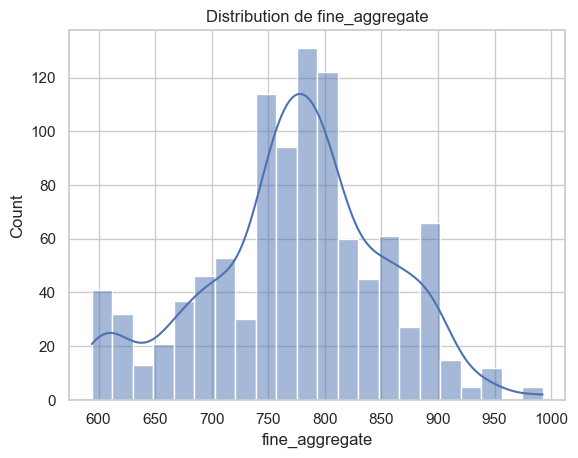

Valeurs extrêmes: 594.0 → 992.6 




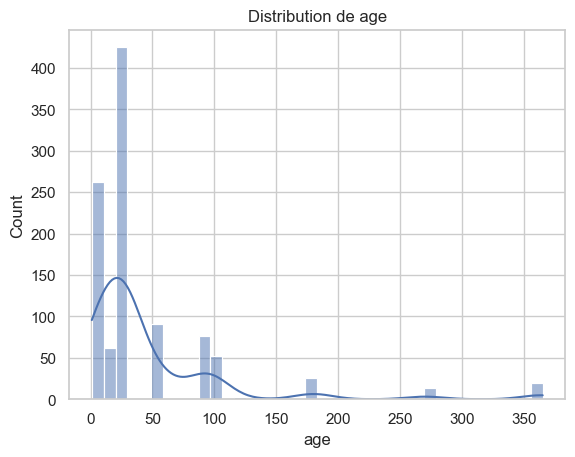

Valeurs extrêmes: 1 → 365 




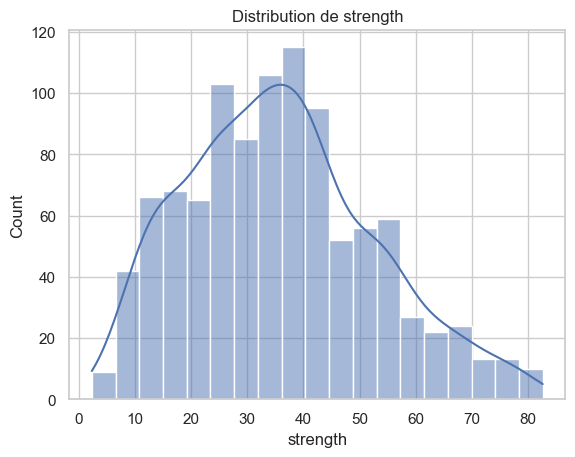

Valeurs extrêmes: 2.331807832 → 82.5992248 




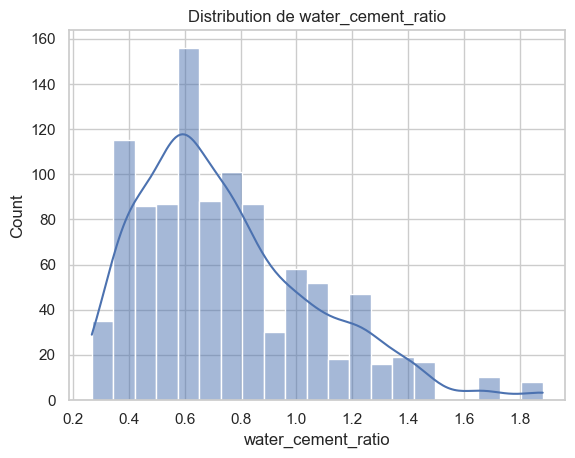

Valeurs extrêmes: 0.26689252776209305 → 1.8823529411764706 




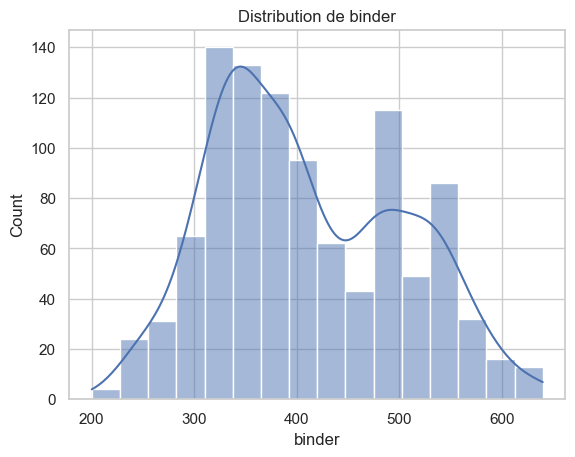

Valeurs extrêmes: 200.0 → 640.0 




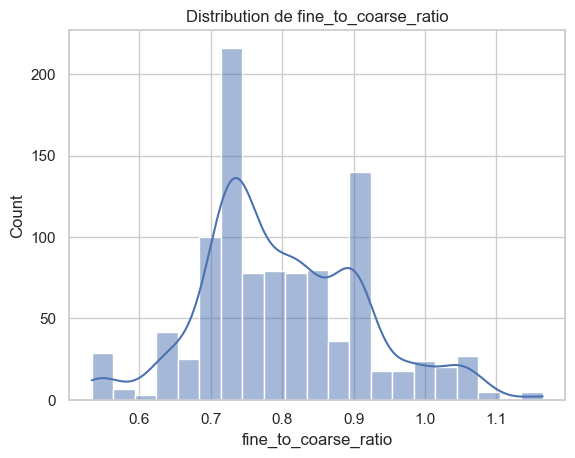

Valeurs extrêmes: 0.533368597372829 → 1.1648867503814107 




In [7]:
for col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution de {col}")
        plt.show()
        print("Valeurs extrêmes:", df[col].min(), "→", df[col].max(), "\n\n")

# Matrice de corrélation

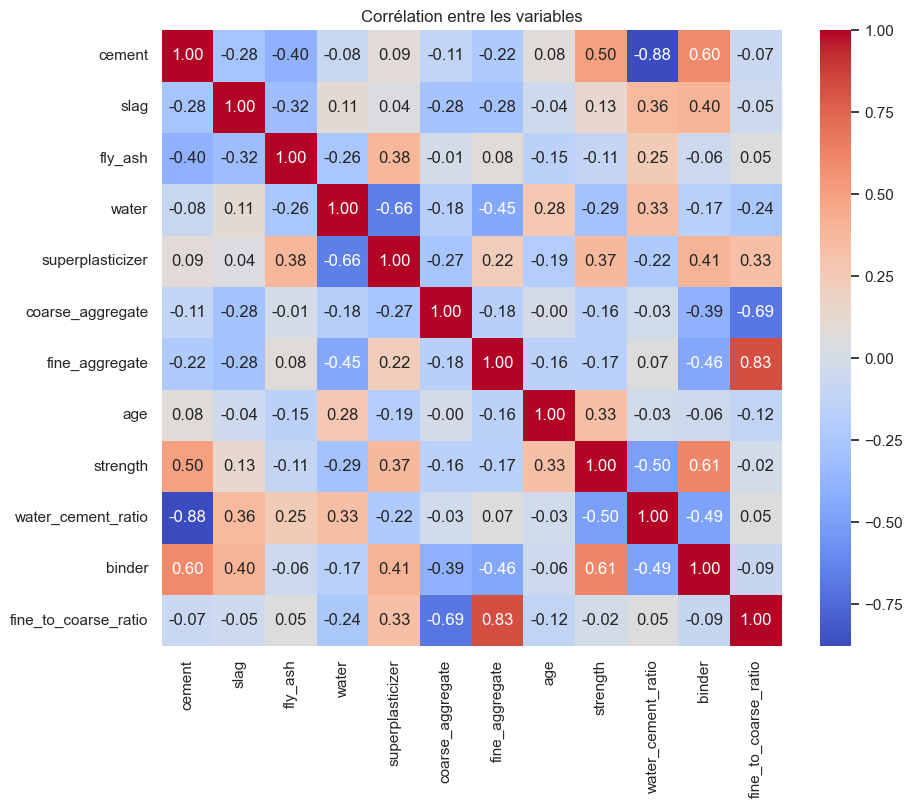

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

## Top 5 des variables les plus influentes sur strength

D'apres la matrice de corrélation, les variables plus influentes pour prédire la résistance à la compression du béton (strength) sont: 
- **binder +0.60**: La quantité de liant total (ciment + ajouts) augmente la résistance. Ce qui est tout à fait logique : plus de liant = meilleure cohésion.
- **cement +0.50**: Le ciment est l'ingrédient actif principal du béton. Plus on en met, plus le béton est résistant (dans la limite des dosages raisonnables).
- **water_cement_ratio−0.50**: Une trop forte quantité d'eau par rapport au ciment dilue le mélange, créant ainsi plus de porosité, et donc moins de résistance.
- **superplasticizer +0.37** Cette ingrédient permet de réduire l'eau sans nuire à la maniabilité du mélange, donc améliore la résistance sans augmenter le ciment.
- **age +0.33**: Le béton durcit avec le temps, surtout pendant les 28 premiers jours. Cette tendance est bien visible dans l'histogramme précédent.

# Analyse bivariée

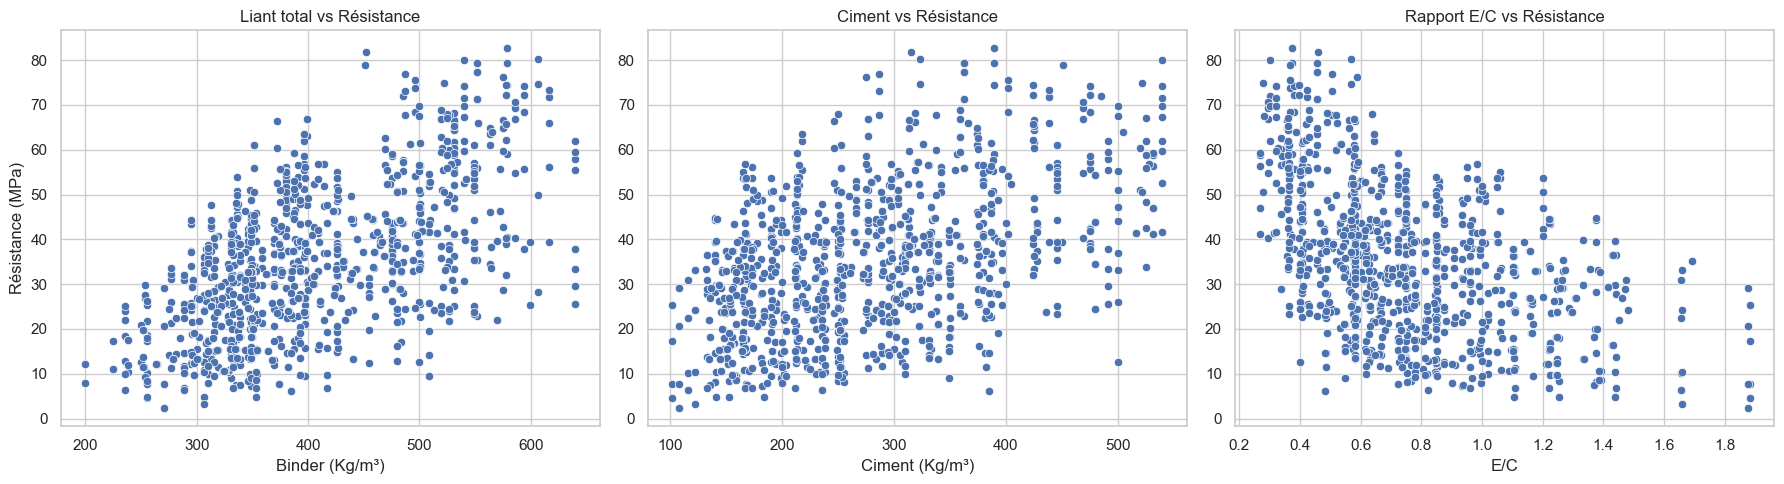

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Liant total vs Résistance
sns.scatterplot(x=df["binder"], y=df["strength"], ax=axs[0])
axs[0].set_title("Liant total vs Résistance")
axs[0].set_xlabel("Binder (Kg/m³)")
axs[0].set_ylabel("Résistance (MPa)")

# 2. Ciment vs Résistance
sns.scatterplot(x=df["cement"], y=df["strength"], ax=axs[1])
axs[1].set_title("Ciment vs Résistance")
axs[1].set_xlabel("Ciment (Kg/m³)")
axs[1].set_ylabel("")

# 3. Rapport Eau/Ciment vs Résistance
sns.scatterplot(x=df["water_cement_ratio"], y=df["strength"], ax=axs[2])
axs[2].set_title("Rapport E/C vs Résistance")
axs[2].set_xlabel("E/C")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()

#  Détection des outliers (Z-score et IQR)

In [10]:
from scipy.stats import zscore

z = np.abs(zscore(df.select_dtypes(include=np.number)))
outliers = (z > 3)
print("Nombre de valeurs extrêmes par variable :")
pd.DataFrame(outliers, columns=df.columns).sum()


Nombre de valeurs extrêmes par variable :


cement                   0
slag                     4
fly_ash                  0
water                    2
superplasticizer        10
coarse_aggregate         0
fine_aggregate           0
age                     33
strength                 0
water_cement_ratio      10
binder                   0
fine_to_coarse_ratio     5
dtype: int64

In [11]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Détection des outliers
    mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    num_outliers = mask_outliers.sum()
    if num_outliers > 0:
        print(f" - {col}: {num_outliers}")
        # Traitement des outliers par clipping
        df[col] = df[col].clip(lower_bound, upper_bound)

 - slag: 2
 - water: 9
 - superplasticizer: 10
 - fine_aggregate: 5
 - age: 59
 - strength: 4
 - water_cement_ratio: 18
 - fine_to_coarse_ratio: 5


#### Les données étant asymétrique (pas gaussienne), une imputation par la methode IQR a été utilisée.

# Corrélation et importance des variables

Corrélations avec la résistance :
 binder                  0.613268
cement                  0.498009
age                     0.469809
superplasticizer        0.366257
slag                    0.134617
fine_to_coarse_ratio   -0.016938
fly_ash                -0.105576
coarse_aggregate       -0.165241
fine_aggregate         -0.169609
water                  -0.290966
water_cement_ratio     -0.505547
Name: strength, dtype: float64


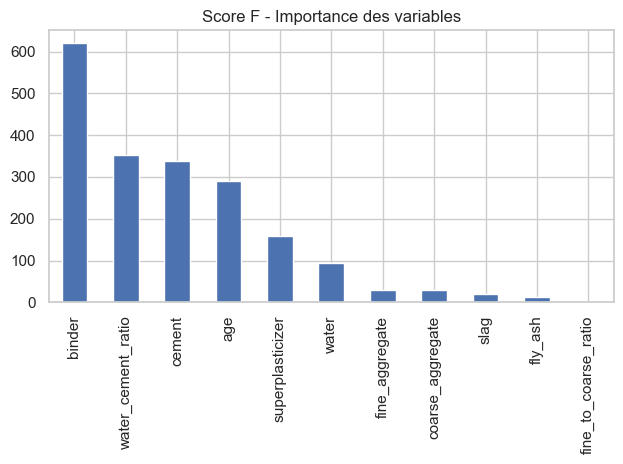

In [12]:
target = "strength"
features = df.drop(columns=[target])
y = df[target]

# Corrélations simples
corrs = df.corr()[target].drop(target).sort_values(ascending=False)
print("Corrélations avec la résistance :\n", corrs)

# Sélection par tests statistiques
f_scores, p_values = f_regression(features, y)
importance = pd.Series(f_scores, index=features.columns).sort_values(ascending=False)
importance.plot(kind="bar", title="Score F - Importance des variables")
plt.tight_layout()
plt.show()

# PCA – Réduction de dimension
objectif: Réduire le nombre de variables tout en conservant l’essentiel de la variance du jeu de données.

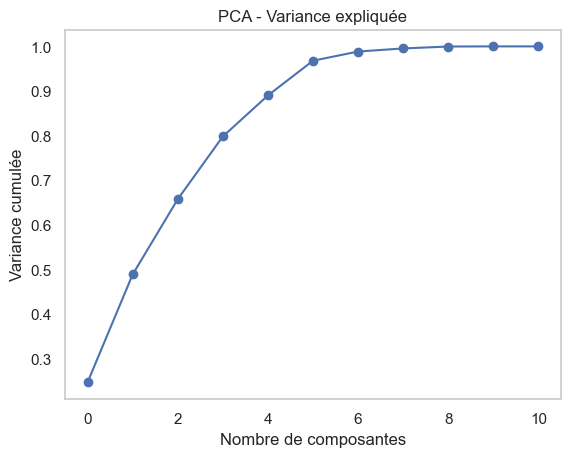

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
explained_var = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_var), marker="o")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.title("PCA - Variance expliquée")
plt.grid()
plt.show()


#### Interprétation du résultat :

- Les 4 premières composantes expliquent ≈ 95% de la variance cumulée.
- On observe une cassure (coude) claire entre la 4ᵉ et la 5ᵉ composante → typique du "elbow method".
- Après la 5ᵉ composante, le gain de variance est marginal (plateau).

Ainsi donc, l’essentiel de l’information des 8 ingrédients chimiques/matériaux du béton est très redondant.

In [14]:
# Les poids (loadings) des variables sur les composantes
pd.DataFrame(pca.components_, columns=features.columns, index=[f"PC{i+1}" for i in range(len(features.columns))])


,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,water_cement_ratio,binder,fine_to_coarse_ratio
PC1,0.371196,-0.075426,0.034623,-0.391469,0.439788,-0.253569,0.181237,-0.094134,-0.424453,0.371843,0.290226
PC2,-0.416967,-0.080905,0.294350,-0.193530,0.172640,-0.118132,0.492959,-0.108012,0.323225,-0.341885,0.419168
PC3,-0.132623,0.601660,-0.147166,0.255487,0.047828,-0.546680,-0.125556,-0.022107,0.273756,0.308581,0.214290
PC4,-0.251171,0.215009,0.472808,-0.291997,0.379481,0.230541,-0.330167,-0.221784,0.173258,0.243148,-0.370651
PC5,0.018931,-0.303557,0.495875,0.244284,0.124474,-0.268127,-0.169027,0.691464,0.031659,0.081054,0.016639
PC6,-0.132903,0.373463,-0.341281,-0.385655,0.167147,0.275586,0.155335,0.668197,0.011501,-0.037833,-0.039921
PC7,0.026669,-0.146967,-0.353232,0.350570,0.754138,-0.006829,-0.144376,-0.069313,0.067563,-0.350490,-0.090493
PC8,0.480268,-0.235339,-0.128584,-0.155261,0.002096,0.127557,0.015136,0.019038,0.773014,0.233194,0.067245
PC9,0.063604,0.175859,0.176337,0.550679,0.134890,0.499012,0.475368,-0.001583,-0.053116,0.356929,0.085329
PC10,-0.052691,0.019231,0.017946,0.010219,-0.011488,0.395689,-0.547378,0.003939,-0.065830,-0.029187,0.731370


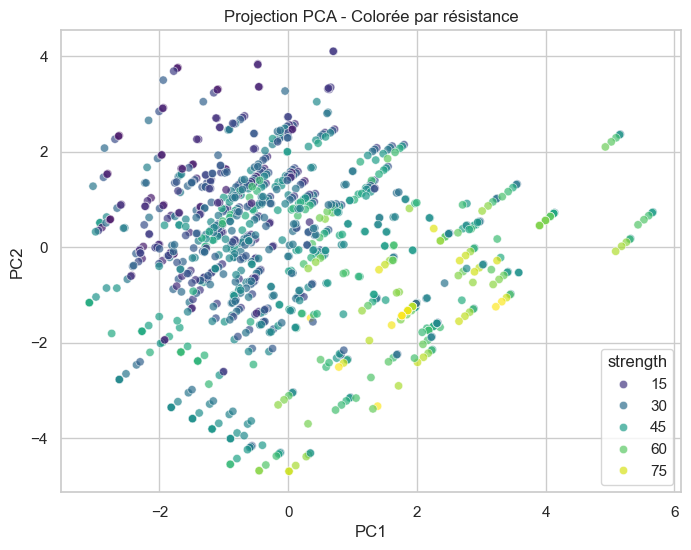

In [15]:
# Biplot des 2 premières composantes
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette="viridis", alpha=0.7)
plt.title("Projection PCA - Colorée par résistance")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#### Interpretation:
On observe une répartition relativement continue, sans regroupement strict, ce qui suggère que les classes de résistance ne forment pas de clusters discrets.
Un gradient net est observable de la gauche vers la droite (PC1): cela signifie que la première composante principale (PC1) est corrélée positivement à la résistance à la compression du béton. Autrement, PC1 explique une part significative de la variable cible **strength**.

Il y a peu de variation de résistance selon l’axe vertical. 
Le PC2 n’explique pas vraiment la résistance, mais peut capturer d'autres variations entre les formulations de béton.


#### Corrélation entre PC1 et la résistance (strength)

In [16]:
# PCA
pc1 = X_2d[:, 0]  # Première composante principale

# Corrélation avec la résistance
corr, pval = pearsonr(pc1, y)  # y = df["strength"]
print(f"Corrélation PC1 - Strength : {corr:.3f} (p-value = {pval:.3e})")


Corrélation PC1 - Strength : 0.517 (p-value = 2.060e-71)


**p-value de 2.060e-71 très petite** : signifie que cette corrélation est extrêmement significative (aucun doute statistique).

La première composante principale (PC1) est partiellement représentative de la résistance à la compression.

Une grande partie de l'information liée à la résistance peut donc être résumée dans une combinaison linéaire de quelques variables d'entrée (celles qui contribuent fortement à PC1).


#### Visualiser les contributions des variables (charges) sur PC1 et PC2

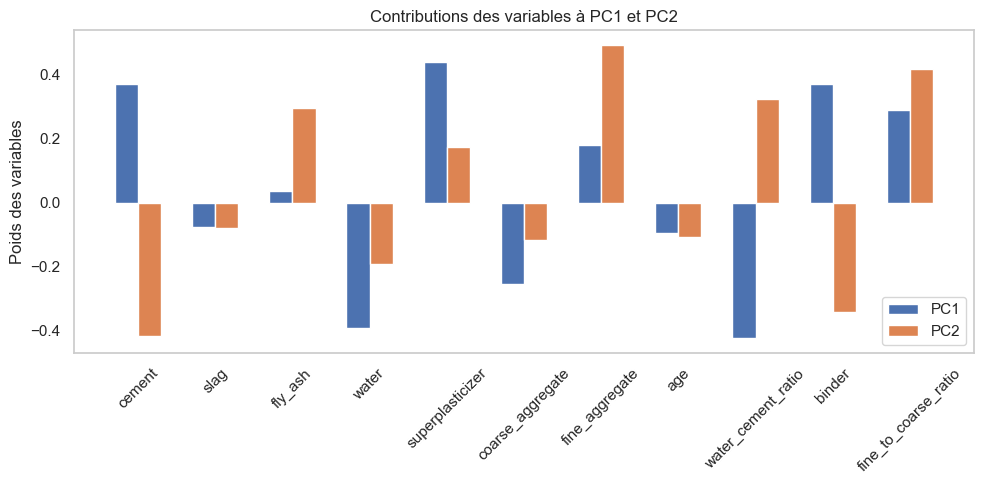

In [17]:
# Noms des colonnes
cols = features.columns

# Charges (loadings)
loadings = pca2.components_.T  # shape: (n_features, n_components)

plt.figure(figsize=(10, 5))
x = np.arange(len(cols))

plt.bar(x - 0.15, loadings[:, 0], width=0.3, label='PC1')
plt.bar(x + 0.15, loadings[:, 1], width=0.3, label='PC2')
plt.xticks(x, cols, rotation=45)
plt.ylabel("Poids des variables")
plt.title("Contributions des variables à PC1 et PC2")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


#### Analyser les variables qui contribuent le plus à PC1 et PC2

In [18]:
loading_df = pd.DataFrame(data=loadings, index=features.columns, columns=["PC1", "PC2"]).sort_values("PC1", ascending=False)

print("Variables les plus contributrices à PC1 :")
print(loading_df["PC1"].sort_values(ascending=False))

print("\nVariables les plus contributrices à PC2 :")
print(loading_df["PC2"].sort_values(ascending=False))


Variables les plus contributrices à PC1 :
superplasticizer        0.439788
binder                  0.371843
cement                  0.371196
fine_to_coarse_ratio    0.290226
fine_aggregate          0.181237
fly_ash                 0.034623
slag                   -0.075426
age                    -0.094134
coarse_aggregate       -0.253569
water                  -0.391469
water_cement_ratio     -0.424453
Name: PC1, dtype: float64

Variables les plus contributrices à PC2 :
fine_aggregate          0.492959
fine_to_coarse_ratio    0.419168
water_cement_ratio      0.323225
fly_ash                 0.294350
superplasticizer        0.172640
slag                   -0.080905
age                    -0.108012
coarse_aggregate       -0.118132
water                  -0.193530
binder                 -0.341885
cement                 -0.416967
Name: PC2, dtype: float64


### Justification du choix du modèle XGBoost pour la suite du projet

L’objectif ici est de prédire la résistance à la compression du béton à partir de ses composants. C’est un problème typique de régression supervisée. Après avoir creusé les statistiques du dataset, on remarque que les liens entre les variables d’entrée et la résistance ne sont pas toujours linéaires, et qu’il existe des interactions complexes.

C’est justement dans ce genre de situation que XGBoost se démarque : il est rapide, robuste, et surtout très bon pour capter les non-linéarités et les effets croisés entre variables. Il fonctionne bien même avec un volume de données comme le nôtre, et il offre de nombreuses possibilités de réglage fin (grid search, Optuna, etc.) pour aller chercher un maximum de performance sans surapprendre.

En plus, XGBoost permet d’évaluer l’importance des variables, ce qui aide à mieux comprendre le modèle. Bref, c’est un choix à la fois puissant, flexible et adapté à notre cas concret.